# Logistic Regression

Implement logistic regression without sklearn.linearregression. The goal of this practice is to help me better understand how logistic regression works.

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Load dataset

In [2]:
breast_cancer = load_breast_cancer()

df = pd.DataFrame(breast_cancer['data'], columns = breast_cancer['feature_names'])

target = pd.DataFrame(breast_cancer['target'], columns = ['Target'])

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
target.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Feature normalization

In [6]:
X_arr = df.as_matrix()

scaler = StandardScaler()

X_arr = scaler.fit_transform(X_arr)

y_arr = target.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


# Gradient Descent


## Define sigmoid function, cost function and gradient descent function

In [7]:
def sigmoid(z):
    
    # compute the sigmoid of each value of z
    
    # due to machine percision limit, warp sigmoid with upper and lower limit
    
    g = 1/(np.exp(-z) + 1)
    
    g = np.minimum(g, 0.9999999999999999)
    
    g = np.maximum(g, 0.0000000000000001)
    
    return g


def cost_function(X, y, theta):
    
    m = len(y)
    
    h = sigmoid(np.matmul(X,theta))
    
    cost = np.sum((-y)*np.log(h) - (1-y)*np.log(1-h))/m
    
    grad = np.matmul(np.transpose(X),(h - y))/m
    
    return cost, grad


def gradient_descent(X, y, theta, learning_rate, n_iter):
    
    m = len(y)
    
    cost_arr = np.ones((n_iter,1))
    
    for i in range(0,n_iter):
        
        cost = cost_function(X,y,theta)[0]
        
        grad = cost_function(X,y,theta)[1]
        
        theta = theta - grad * learning_rate
        
        cost_arr[i] = cost
        
    return theta, cost_arr
        

## Data preprocessing

In [8]:
m = len(y_arr) 

new_X = np.hstack((np.ones((m,1)), X_arr))

theta = np.ones((np.size(new_X,1),1))

## Plot cost and print parameters

Text(0,0.5,'Cost')

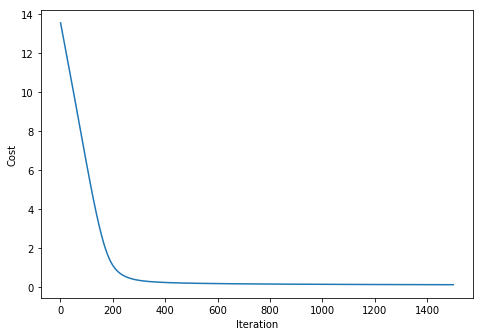

In [9]:
# plot cost function

n_iter = 1500

x_axis = np.arange(1, n_iter + 1)

y_axis = gradient_descent(new_X, y_arr, theta, 0.01, 1500)[1]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x_axis, y_axis)
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')

In [10]:
# Print parameters

param = gradient_descent(new_X, y_arr, theta, 0.01, 1500)[0]

param

array([[ 1.09511937],
       [-0.27594282],
       [-0.40315959],
       [-0.3221811 ],
       [-0.25360648],
       [-0.14851121],
       [-0.39735061],
       [-0.60581077],
       [-0.67968269],
       [-0.10156221],
       [ 0.55038962],
       [-0.41926293],
       [ 0.25924354],
       [-0.35871433],
       [-0.19567478],
       [ 0.32635237],
       [ 0.02017368],
       [ 0.14632985],
       [-0.2833862 ],
       [ 0.35308203],
       [ 0.35278149],
       [-0.4316085 ],
       [-0.52380126],
       [-0.44758476],
       [-0.34652983],
       [-0.29736344],
       [-0.29153273],
       [-0.44958578],
       [-0.65583659],
       [-0.2144798 ],
       [ 0.00911953]])

## Make predictions

In [11]:
# define predict function

def predict(X, theta):
    
    m = np.size(X,0)

    hx = np.matmul(X, theta)
    
    p = sigmoid(hx)
    
    for i in range(0,m):
        
        if(p[i] >=0.5):
            p[i] = 1
        else:
            p[i] = 0
                  
    return p

In [12]:
# make predictions

predictions = predict(new_X, param)

## Evaluate model

In [13]:
def model_report(predict, y):
    
    m = len(y)
    
    TP = 0  # true positive
    TN = 0  # true nagetive
    FP = 0  # false positive
    FN = 0  # false negative
    
    for i in range(0,m):
        
        if(predict[i] == y[i]):
            
            if(y[i] == 1):
                
                TP += 1
                
            else:
                
                TN += 1
                
        else:
            
            if(y[i] == 1):
                
                FN += 1
                
            else:
                
                FP += 1
                
                
                
    accuracy = (TP + TN) / m
    
    precision = TP / (TP + FP)
    
    recall = TP / (TP + FN)
    
    dic = {'Accuracy':accuracy, 'Precision': precision, 'Recall':recall}
    
    return dic   
    

In [14]:
model_report(predictions, y_arr)

{'Accuracy': 0.9648506151142355,
 'Precision': 0.9493333333333334,
 'Recall': 0.9971988795518207}

# Sklearn

## Train test split

In [15]:
# train test split

from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=101)

## Training and Predicting

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logit = LogisticRegression()

logit.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
logit.coef_

array([[ 2.26656891,  0.11630072, -0.11318364,  0.00702523, -0.12436353,
        -0.44098575, -0.59968432, -0.28308766, -0.26576283, -0.03239333,
         0.00426299,  0.62957852,  0.38213857, -0.07900188, -0.01409697,
        -0.06849993, -0.09171854, -0.03819653, -0.08345995, -0.00661204,
         1.3451753 , -0.31240119, -0.11475616, -0.03413068, -0.2254532 ,
        -1.09729105, -1.29592749, -0.51833083, -0.7724882 , -0.11423451]])

In [20]:
sk_predictions = logit.predict(X_test)

## Evaluation

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, sk_predictions))

             precision    recall  f1-score   support

          0       0.95      0.88      0.91        66
          1       0.93      0.97      0.95       105

avg / total       0.94      0.94      0.94       171

